In [45]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## 1

In [125]:
crazy_hat = pd.read_csv('crazy-hat.tsv', sep = '\t')
crazy_hat

,x,y,group
0,0,22,outline
1,16,-18,outline
2,-16,-18,outline
3,0,22,outline
4,-3,7,leye
5,-3,14,leye
6,2,7,reye
7,2,14,reye
8,-11,-10,mouth
9,-7,-17,mouth


In [91]:
def c_hat(data):
    #splices data into groups
    outline = data[:4][['x', 'y']].values.T
    leye = data[4:6][['x', 'y']].values.T
    reye = data[6:8][['x', 'y']].values.T
    mouth = data[8:][['x', 'y']].values.T
    
    #plots the grouped data
    plt.axes().set_aspect('equal')
    plt.plot(outline[0,:], outline[1,:])
    plt.plot(leye[0,:], leye[1,:])
    plt.plot(reye[0,:], reye[1,:])
    plt.plot(mouth[0,:], mouth[1,:])

__1.1__

In [92]:
def flip_x(data):
    #converts to matrix
    a = data.drop('group', axis=1).values.T
    #creates flip matrix
    b = np.array([[-1, 0],[0,1]])
    #flips original matrix
    c = b @ a
    #reasigns x value
    data.x = c[0]
    return(data)

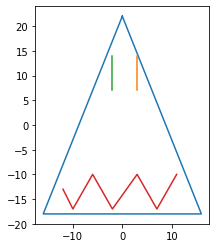

In [95]:
c_hat(flip_x(crazy_hat))

### 1.2

In [97]:
def stretch_y(data, s):
    #converts to matrix
    a = data.drop('group', axis=1).values.T
    #creates stretch matrix
    b = np.array([[1, 0],[0,s]])
    #stretches original matrix
    c = b @ a
    #reasigns x values 
    data.y = c[1]
    return(data)

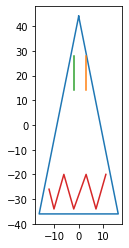

In [98]:
c_hat(stretch_y(crazy_hat, 2))

### 1.3

In [106]:
def rotate(data, angle):
    #converts degrees into radians
    alpha = np.pi*angle/180    
    #converts to matrix
    a = data.drop('group', axis=1).values.T
    #creates the rotation matrix
    b = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])
    #rotates original matrix
    c = b @ a
    #reasigns x & y values
    data.x = c[0]
    data.y = c[1]
    return(data)

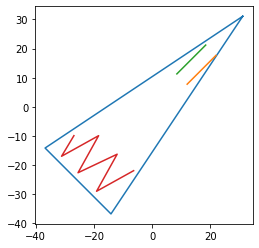

In [151]:
crazy_hat = pd.read_csv('crazy-hat.tsv', sep = '\t')

a = flip_x(crazy_hat)

a = stretch_y(a, 2)

a = rotate(a, 45)

c_hat(a)

### 1.4

In [175]:
#create flip transformation
flip = np.array([[-1, 0],[0,1]])

#create stretch transformation
stretch = np.array([[1, 0],[0,2]])

#creates rotation 45 degrees transformation
alpha = np.pi*45/180   
rotate = np.array([[np.cos(alpha), np.sin(alpha)], [-np.sin(alpha), np.cos(alpha)]])

#dot products to combine into single transformation matrix
single_transform = flip @ stretch
single_transform = rotate @ single_transform
single_transform

array([[-0.70710678,  1.41421356],
       [ 0.70710678,  1.41421356]])

### 1.5

In [177]:
np.linalg.det(single_transform)

-2.0000000000000004

__The single transformation changes the area of the unit square by 2, which we know by taking the determinant of the single transformation__

### 2.1

In [178]:
A = np.array([[1, 0],[0, 1]])

### 2.2

In [179]:
np.linalg.eig(A)

(array([1., 1.]), array([[1., 0.],
        [0., 1.]]))

### 2.3

In [241]:
def quadratic(x, A):
    y = x.T @ A @ x
    return y

In [242]:
def contour(A):
    nGrid = 50
    x1 = np.linspace(-4, 4, nGrid)
    x2 = np.linspace(-4, 4, nGrid)
    y = np.empty((nGrid, nGrid))
    for i in range(len(x1)):
        for j in range(len(x2)):
            y[i,j] = quadratic(np.array([x1[i], x2[j] ]), A)
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    a = ax.contour(x2, x1, y)
    ax.set_aspect('equal')
    plt.show()

### 2.4

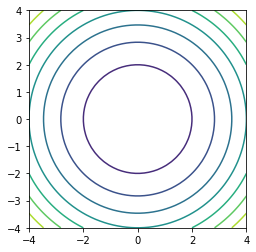

In [283]:
A = np.array([[1, 0],[0, 1]])
contour(A)

### 2.5

In [244]:
def symetric(x):
    r = x.T + x
    return(r)

In [264]:
def elipse(x1, x2, y1, y2):
    #creates the matrix
    A = np.array([[x1, x2],[y1, y2]])
    #ensures symetry
    A = symetric(A)
    #plots
    contour(A)

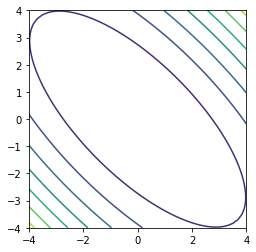

In [279]:
elipse(2,1,1,2)

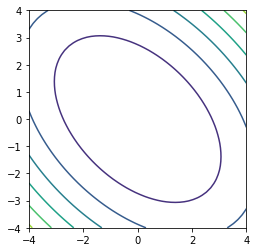

In [281]:
elipse(1,0,.9,1)

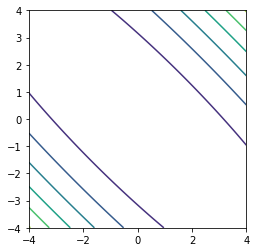

In [282]:
elipse(1,.9,.9,1)

__x1,y2 must be larger than x2,y1 to create an elipse. The smaller the difference between them to more elongated the elipse. When there is no difference between the two the countours become sets of parrallel lines__